XGBoost model using mock random data, once the data is filled in I should juse be able drop it in and do a little tuning and we will be done.

This code splets the data into training, validaiton, and held-out test sets.

The values of the features are scaled using the training data.

The XGBoost model is then trained. A grid search is performed to tune the hyperparameters. 

The best model is then trained on the entire training data and the held-out test data is used to evaluate the model.

The confusion matrix, accuracy, precision, recall, f1-score, sensitivity, and negative predictive value are all calculated for the held-out test data.

The feature importances are then plotted for the top features for each type (weight, gain, cover).


In [14]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
import numpy as np

# Load the dataset
file_path = r"C:\Users\nprim\Downloads\test_PE_filled_v2.xlsx"
data = pd.read_excel(file_path)

# Drop the identifier column and separate features (X) and target (y)
X = data.drop(columns=['accession_number_angio', '72_hr_mortality (0/1)'])
y = data['72_hr_mortality (0/1)']

# Split into training and held-out test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Handle missing values by filling with the median of each column in the training set
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

# Scale the feature values (fit on training data, apply to both train and test sets)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'colsample_bytree': [0.3, 0.7, 1],
    'subsample': [0.5, 0.7, 1],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 0.5, 0.1]
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Use StratifiedKFold to maintain class distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use GridSearchCV for hyperparameter tuning on the training set
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model using GridSearchCV on the training set
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the best score from GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy on Training Set: {grid_search.best_score_}")

# Train the final model with best parameters on the entire training set
best_xgb_model = XGBClassifier(**grid_search.best_params_, random_state=42)
best_xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the held-out test set
y_test_pred = best_xgb_model.predict(X_test_scaled)

# Calculate confusion matrix on test set
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate metrics for the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Sensitivity is recall for positive class (tp / (tp + fn))
sensitivity_test = tp / (tp + fn)

# Negative Predictive Value (NPV) is tn / (tn + fn)
npv_test = tn / (tn + fn)

# Print metrics for the test set
print(f"\nHeld-Out Test Set Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-Score: {f1_test:.4f}")
print(f"Sensitivity (Recall for Positive Class): {sensitivity_test:.4f}")
print(f"Negative Predictive Value (NPV): {npv_test:.4f}")

# Optionally print the classification report for the test set
print("\nClassification Report for Test Set:\n")
print(classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 1}
Best Accuracy on Training Set: 0.6266666666666667

Held-Out Test Set Metrics:
Accuracy: 0.5526
Precision: 0.5535
Recall: 0.5526
F1-Score: 0.5192
Sensitivity (Recall for Positive Class): 0.8000
Negative Predictive Value (NPV): 0.5556

Classification Report for Test Set:

              precision    recall  f1-score   support

           0       0.56      0.28      0.37        18
           1       0.55      0.80      0.65        20

    accuracy                           0.55        38
   macro avg       0.55      0.54      0.51        38
weighted avg       0.55      0.55      0.52        38



In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
import numpy as np

# Load the dataset
file_path = r"C:\Users\nprim\Downloads\test_PE_filled_v2.xlsx"
data = pd.read_excel(file_path)

# Drop the identifier column and separate features (X) and target (y)
X = data.drop(columns=['accession_number_angio', '72_hr_mortality (0/1)'])
y = data['72_hr_mortality (0/1)']

# Split into training and held-out test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Handle missing values by filling with the median of each column in the training set
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

# Scale the feature values (fit on training data, apply to both train and test sets)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'colsample_bytree': [0.3, 0.7, 1],
    'subsample': [0.5, 0.7, 1],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 0.5, 0.1]
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Use StratifiedKFold to maintain class distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use GridSearchCV for hyperparameter tuning on the training set
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model using GridSearchCV on the training set
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the best score from GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy on Training Set: {grid_search.best_score_}")

# Train the final model with best parameters on the entire training set
best_xgb_model = XGBClassifier(**grid_search.best_params_, random_state=42)
best_xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the held-out test set
y_test_pred = best_xgb_model.predict(X_test_scaled)

# Calculate confusion matrix on test set
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate metrics for the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Sensitivity is recall for positive class (tp / (tp + fn))
sensitivity_test = tp / (tp + fn)

# Negative Predictive Value (NPV) is tn / (tn + fn)
npv_test = tn / (tn + fn)

# Print metrics for the test set
print(f"\nHeld-Out Test Set Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-Score: {f1_test:.4f}")
print(f"Sensitivity (Recall for Positive Class): {sensitivity_test:.4f}")
print(f"Negative Predictive Value (NPV): {npv_test:.4f}")

# Optionally print the classification report for the test set
print("\nClassification Report for Test Set:\n")
print(classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 1}
Best Accuracy on Training Set: 0.6266666666666667

Held-Out Test Set Metrics:
Accuracy: 0.5526
Precision: 0.5535
Recall: 0.5526
F1-Score: 0.5192
Sensitivity (Recall for Positive Class): 0.8000
Negative Predictive Value (NPV): 0.5556

Classification Report for Test Set:

              precision    recall  f1-score   support

           0       0.56      0.28      0.37        18
           1       0.55      0.80      0.65        20

    accuracy                           0.55        38
   macro avg       0.55      0.54      0.51        38
weighted avg       0.55      0.55      0.52        38



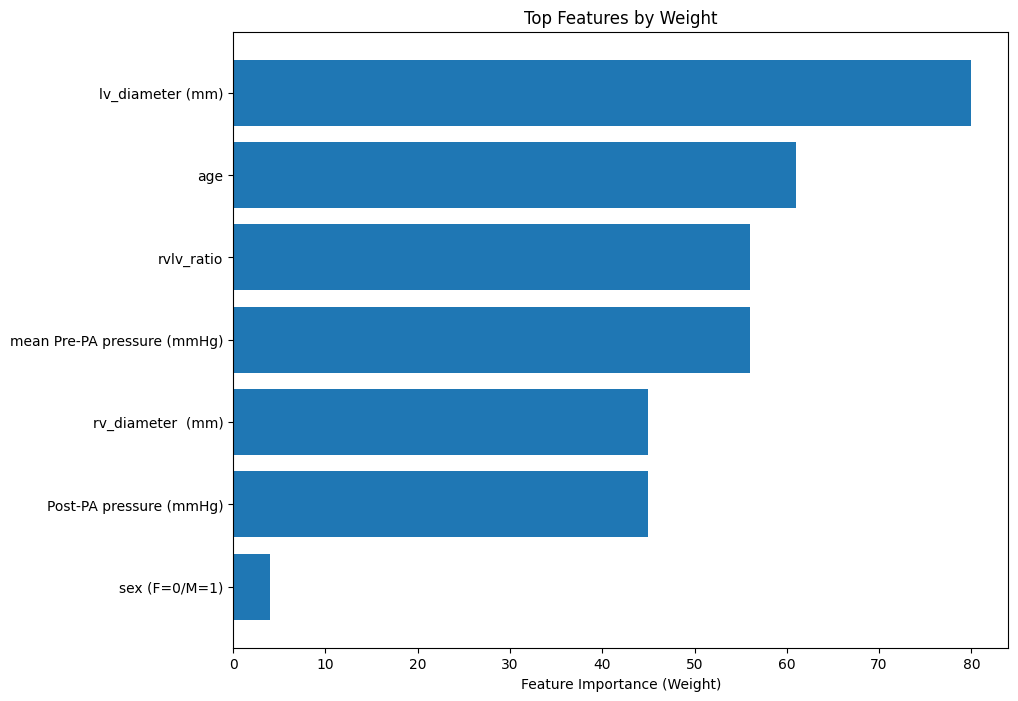

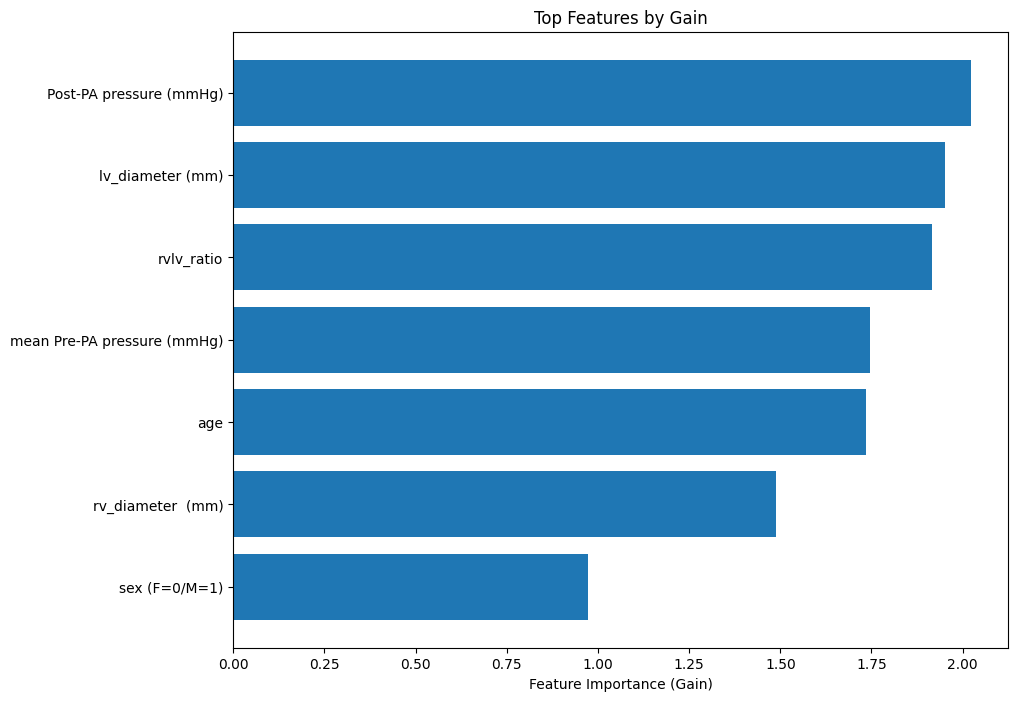

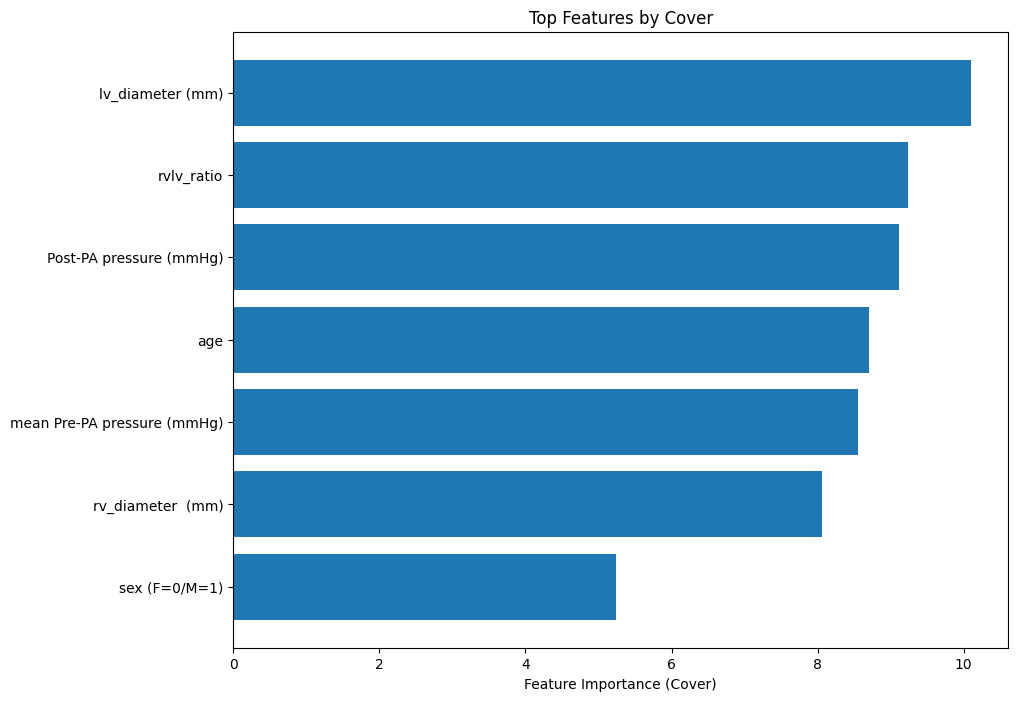

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the feature importances for each type (weight, gain, cover)
importance_types = ['weight', 'gain', 'cover']
feature_names = np.array(X.columns)

for importance_type in importance_types:
    # Get the importance values
    importances = best_xgb_model.get_booster().get_score(importance_type=importance_type)

    # Convert to a sorted list (sorted by importance)
    sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
    
    # Extract up to the top 10 features
    top_features = sorted_importances[:10]
    feature_labels = [feature_names[int(f[1:].replace('f', ''))] for f, v in top_features]
    feature_values = [v for f, v in top_features]
    
    # Plot the top features by the current importance type
    plt.figure(figsize=(10, 8))
    plt.barh(feature_labels, feature_values)
    plt.xlabel(f"Feature Importance ({importance_type.capitalize()})")
    plt.title(f"Top Features by {importance_type.capitalize()}")
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()
